In [1]:
import torch
import PIL.Image as Image
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import torch.optim as optim

In [2]:
from cd_torch import rgb_from_hed, hed_from_rgb, separate_stains, combine_stains

In [9]:
from adaptive_color_decomvolution import acd

In [18]:
device = 'cuda'
template = TF.to_tensor(Image.open("../ref1.png")).unsqueeze(0)
target = TF.to_tensor(Image.open("../ref2.jpg")).unsqueeze(0)
#target = TF.to_tensor(Image.open("../ref3.png")).unsqueeze(0)

In [19]:
m_temp = acd(template, device)
m_tar  = acd(target, device)

In [20]:
with torch.no_grad():
    M = m_temp[0]
    D = m_tar[1]
    W = m_tar[2]
    hed = separate_stains(target, torch.matmul(W, D))
    rgb = combine_stains(hed, M)

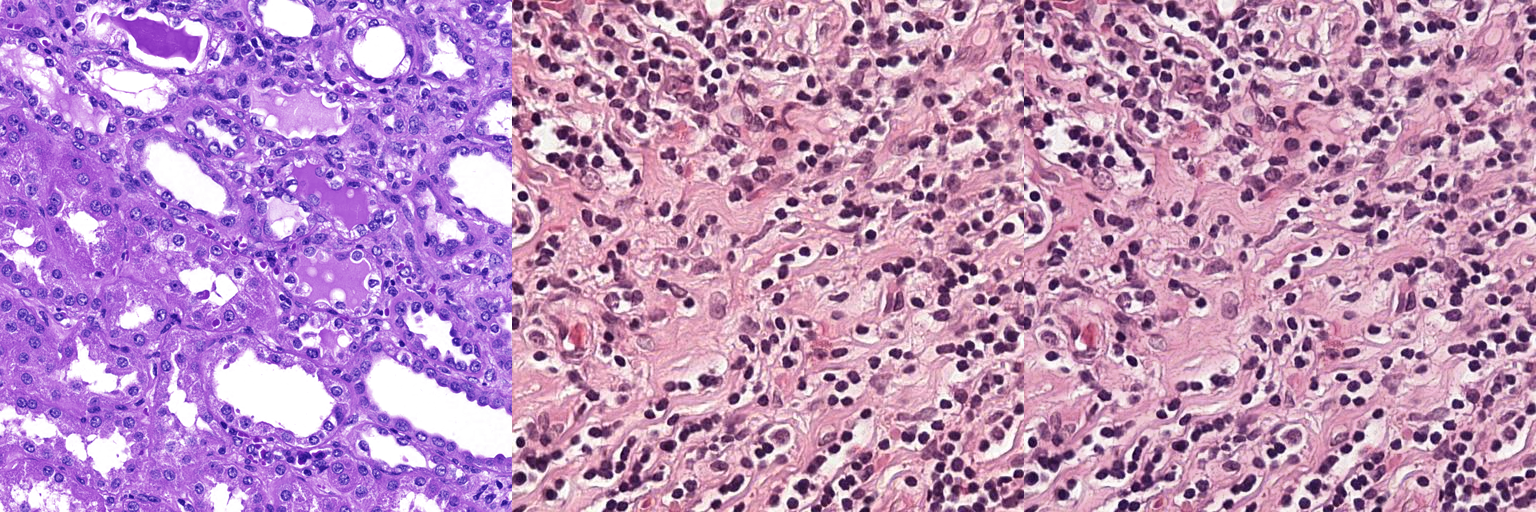

In [21]:
TF.to_pil_image(torch.cat([template, target, rgb], dim=3).squeeze(0))

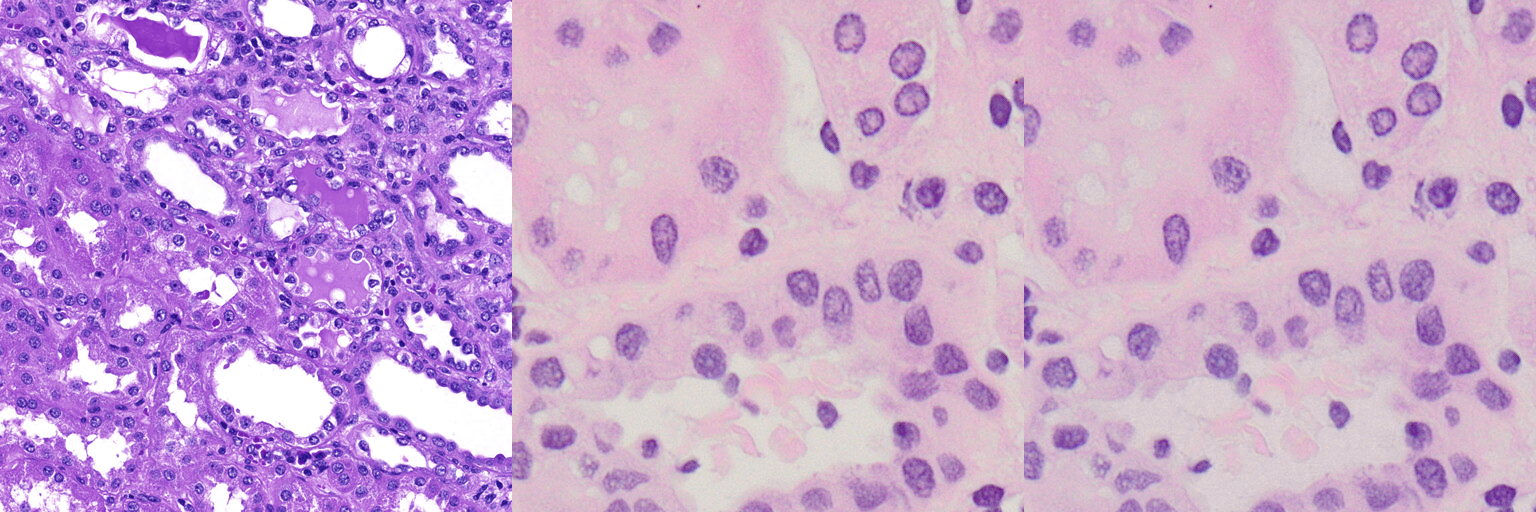

In [17]:
TF.to_pil_image(torch.cat([template, target, rgb], dim=3).squeeze(0))

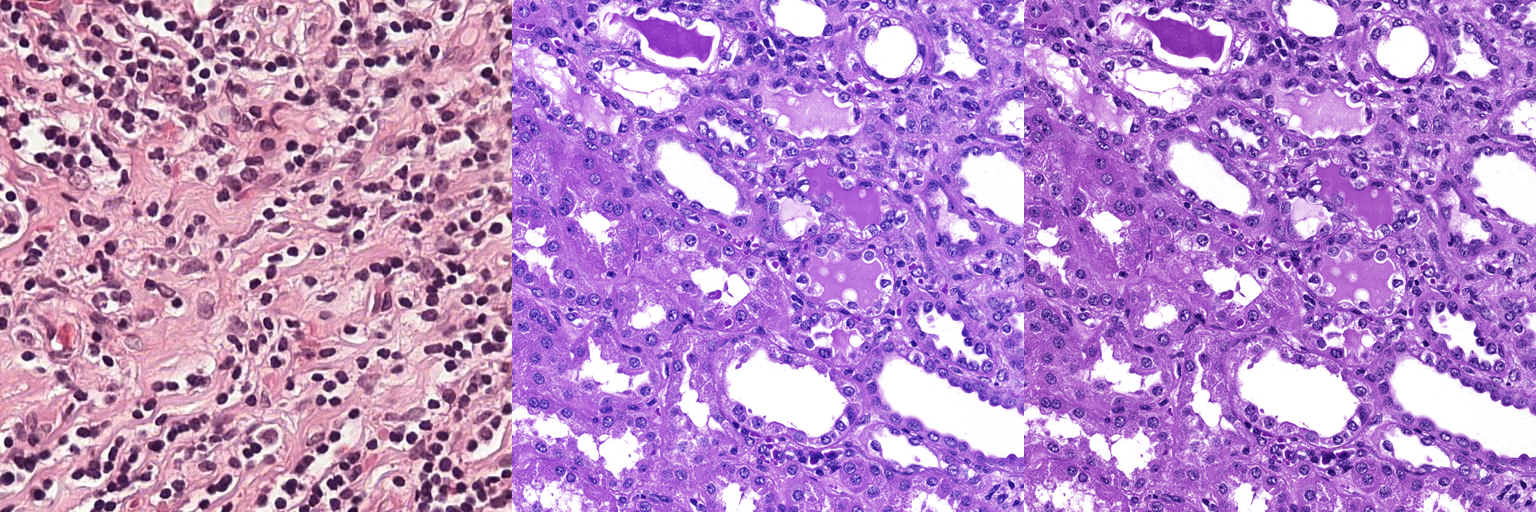

In [7]:
TF.to_pil_image(torch.cat([template, target, rgb], dim=3).squeeze(0))

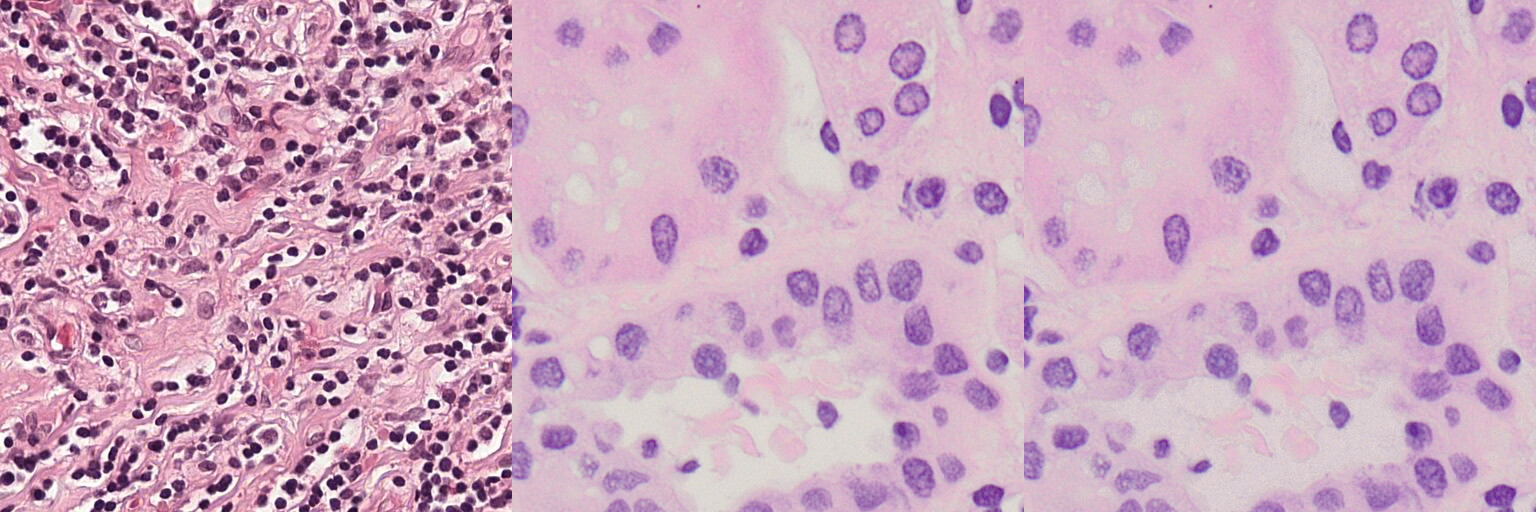

In [13]:
TF.to_pil_image(torch.cat([template, target, rgb], dim=3).squeeze(0))